# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

2024-12-01 00:14:03.601211: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733012043.615016   13708 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733012043.619182   13708 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-01 00:14:03.636512: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)
Image dimensions: (32, 32, 3)
Number of classes: 100


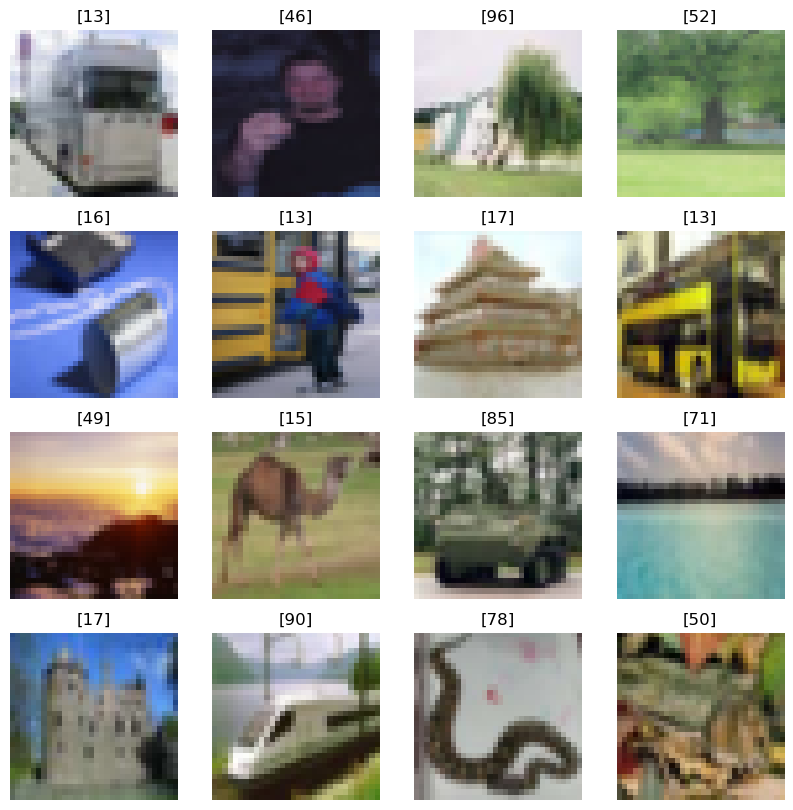

In [2]:
# Your code here

import keras
import numpy as np
import matplotlib.pyplot as plt

# Set the seed
keras.utils.set_random_seed(42)

# Print dataset shapes
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")

# Dimensions of the images
image_shape = x_train[0].shape
print(f"Image dimensions: {image_shape}")

# Number of classes
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

# Display some sample images
def display_samples(images, labels):
    plt.figure(figsize=(10, 10)) 
    for i in range(4*4): 
        plt.subplot(4, 4, i+1) 
        k = np.random.randint(0, images.shape[0]) 
        plt.title(labels[k]) 
        plt.imshow(images[k])
        plt.axis('off') 
    plt.show()     

# Display samples from the training set
display_samples(x_train, y_train)

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
# Your code here

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Parse numbers as floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data
x_train = (x_train) / 255.
x_test = (x_test) / 255.

# number of classes
num_classes = len(np.unique(y_train))

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the training set into training and validation sets (80%-20% split)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print shapes to confirm the split
print(f"Training set shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Validation set shape: {x_val.shape}, Validation labels shape: {y_val.shape}")
print(f"Test set shape: {x_test.shape}, Test labels shape: {y_test.shape}")

Training set shape: (40000, 32, 32, 3), Training labels shape: (40000, 100)
Validation set shape: (10000, 32, 32, 3), Validation labels shape: (10000, 100)
Test set shape: (10000, 32, 32, 3), Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [4]:
#from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout

# Your code here
from keras import Sequential 

# Create the baseline model
baseline_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=image_shape),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Print the model summary
baseline_model.summary()

/home/msugar_dsi_2024_08_gmail_com/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-01 00:14:09.104749: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 556,708 (2.12 MB)

 Trainable params: 556,708 (2.12 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function: Categorical Cross-Entropy</b> 
    - Reason: The dataset involves multi-class classification (100 classes). Categorical Cross-Entropy is the standard loss function for such tasks as it measures the difference between the predicted probability distribution (softmax output) and the true labels (one-hot encoded).
- <b>Optimizer: Adam</b>
    - Reason: Adam (Adaptive Moment Estimation) combines the advantages of both RMSprop and Stochastic Gradient Descent with momentum. It adapts the learning rate for each parameter, which is especially useful for handling the complexities of image data.

In [5]:
from keras import optimizers

# Your code here

# Compile the model
baseline_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',  # Adam optimizer works well initially; can switch to SGD with momentum later
    metrics=['accuracy']
)

print("Model compiled successfully.")

Model compiled successfully.


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [6]:
%%time
# Your code here

EPOCHS = 20 # Start with 20 epochs; can adjust later. 
BATCH_SIZE = 32

# Train the model
baseline_history = baseline_model.fit(
    x_train,
    y_train,
    epochs=EPOCHS,  
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    verbose=1
)

print("Training complete.")

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.0413 - loss: 4.3428 - val_accuracy: 0.1709 - val_loss: 3.5615
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1322 - loss: 3.6665 - val_accuracy: 0.2339 - val_loss: 3.1651
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1830 - loss: 3.3867 - val_accuracy: 0.2569 - val_loss: 3.0480
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.2121 - loss: 3.2193 - val_accuracy: 0.2866 - val_loss: 2.9119
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.2347 - loss: 3.0937 - val_accuracy: 0.3056 - val_loss: 2.7761
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.2482 - loss: 2.9920 - val_accuracy: 0.2969 - val_loss: 2.8270
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.2688 - loss: 2.8994 - val_accuracy: 0.3057 - val_loss: 2.7874
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.2805 - loss: 2

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> {{test_accuracy}}
- <b>Other metric:</b> Categorical Cross-Entropy Loss
- <b>Reason for selection:</b> Cross-entropy loss measures how well the predicted probability distribution aligns with the true labels. It is particularly useful for multi-class classification problems like CIFAR-100.
- <b>Value of metric:</b> {{categorical_crossentropy_loss}}
- <b>Interpretation of metric value:</b> A lower cross-entropy loss (close to 0) indicates the model is making predictions with high confidence, while a higher value suggests less confidence or incorrect predictions.

In [18]:

# Your code here

from keras.metrics import CategoricalCrossentropy
from sklearn.metrics import classification_report

def evaluate(model):
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Calculate additional metric (Categorical Cross-Entropy Loss)
    cce_metric = CategoricalCrossentropy()
    y_pred = model.predict(x_test)
    categorical_crossentropy_loss = cce_metric(y_test, y_pred).numpy()

    print(f"Categorical Cross-Entropy Loss: {categorical_crossentropy_loss:.4f}")
    
    return {"test_loss": test_loss, "test_accuracy": test_accuracy, "categorical_crossentropy_loss": categorical_crossentropy_loss}
    
baseline_metrics = evaluate(baseline_model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3364 - loss: 2.7409
Test Loss: 2.7375
Test Accuracy: 0.3351
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Categorical Cross-Entropy Loss: 2.7347


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

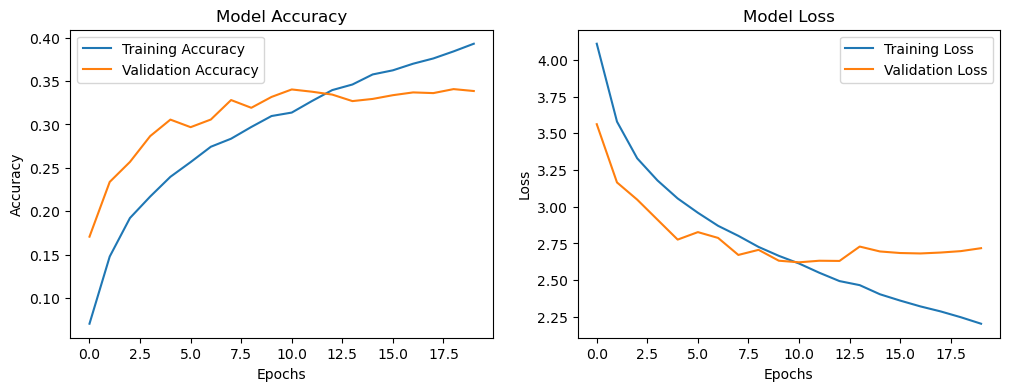

In [8]:
# Your code here

import matplotlib.pyplot as plt

# Plot training and validation accuracy
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
     # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(baseline_history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


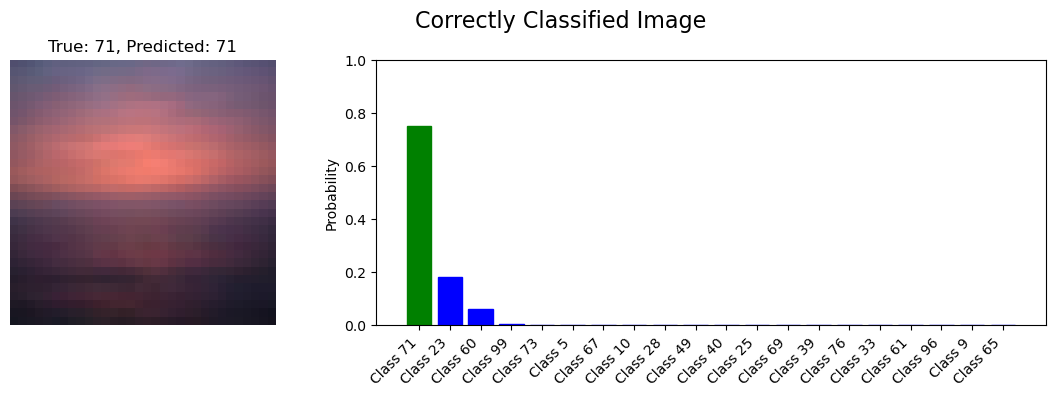

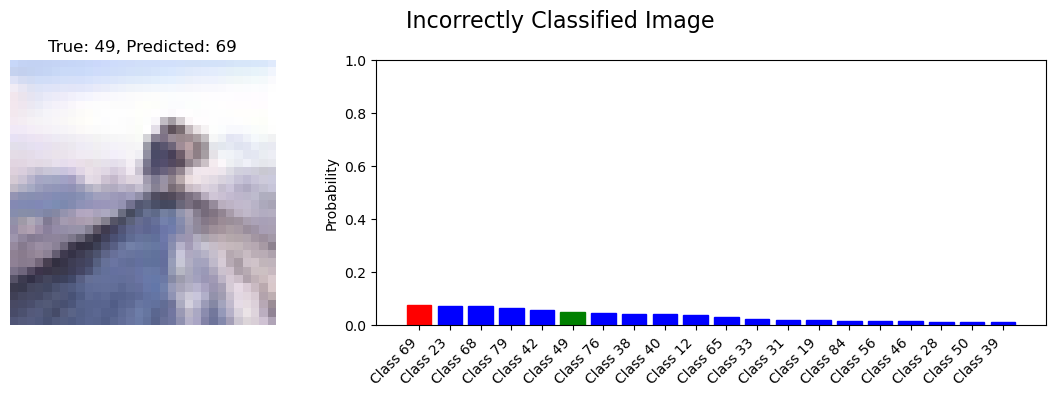

In [9]:
#import numpy as np
#import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def report_correctly_and_incorrectly_classified_images(model):

    # Get model predictions
    y_pred = model.predict(x_test)

    # Convert predictions and true labels back to class indices
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Identify a correctly classified image
    correct_idx = np.where(y_pred_classes == y_true_classes)[0][0]
    correct_image = x_test[correct_idx]
    correct_label = y_true_classes[correct_idx]
    correct_probs = y_pred[correct_idx]

    # Identify an incorrectly classified image
    incorrect_idx = np.where(y_pred_classes != y_true_classes)[0][0]
    incorrect_image = x_test[incorrect_idx]
    incorrect_label = y_true_classes[incorrect_idx]
    incorrect_probs = y_pred[incorrect_idx]

    # Plot the images and probabilities
    def plot_image_and_probs(image, probabilities, true_label, pred_label, title, ntop=20):
        fig = plt.figure(figsize=(12, 4)) 
        fig.suptitle(title, fontsize=16)
        
        # Use gridspec to adjust subplot sizes
        spec = gridspec.GridSpec(nrows=1, ncols=3, width_ratios=[1, 2, 0.1], figure=fig)

        # Plot the image
        ax1 = fig.add_subplot(spec[0])
        ax1.imshow(image)
        ax1.axis('off')
        ax1.set_title(f"True: {true_label}, Predicted: {pred_label}")

        # Sort probabilities and get top N
        top_n_idx = np.argsort(probabilities)[-ntop:][::-1]
        top_n_probs = probabilities[top_n_idx]

        # Plot the probabilities
        ax2 = fig.add_subplot(spec[1])
        bars = ax2.bar(range(ntop), top_n_probs, align='center')
        ax2.set_xticks(range(ntop))
        ax2.set_xticklabels([f"Class {i}" for i in top_n_idx], rotation=45, ha='right')
        ax2.set_ylim([0, 1])
        ax2.set_ylabel('Probability')

        # Highlight true and predicted labels
        for i, (idx, prob) in enumerate(zip(top_n_idx, top_n_probs)):
            color = 'green' if idx == true_label else 'red' if idx == pred_label else 'blue'
            bars[i].set_color(color)

        plt.tight_layout()
        plt.show()

    # Correctly classified image
    plot_image_and_probs(correct_image, correct_probs, correct_label, y_pred_classes[correct_idx], 
                        "Correctly Classified Image")

    # Incorrectly classified image
    plot_image_and_probs(incorrect_image, incorrect_probs, incorrect_label, y_pred_classes[incorrect_idx], 
                        "Incorrectly Classified Image")
    
report_correctly_and_incorrectly_classified_images(baseline_model)    

### Discussion of Results

**Training and Validation Accuracy**:
   - The training accuracy improves steadily over epochs, indicating the model's learning capability on the training data.
   - Validation accuracy improves initially but plateaus and fluctuates slightly after a certain point. This behavior suggests the model may start overfitting to the training data beyond a certain number of epochs.
   
**Correctly Classified Image**:
   - The correctly classified image demonstrates the model's ability to confidently identify the true class (71). The probability distribution shows a clear distinction between the true class and the rest, indicating strong feature extraction for this particular image.

**Incorrectly Classified Image**:
   - The incorrect classification highlights the dataset's inherent difficulty. The model assigns the highest probability to class 69 (incorrect prediction) but distributes significant probability across other classes, including the true class (49).
   - This suggests the features extracted from the image were not distinct enough for accurate classification.

**Does It Make Sense?**
   - Yes, the results are consistent with the behavior expected when using a standard CNN on a dataset like CIFAR-100. With 100 classes, small image size, and relatively small number of samples per class, some misclassifications are expected, especially between visually similar classes. While the model shows overfitting and struggles to generalize, these are natural outcomes given the dataset and the training setup.

**What Do the Probabilities Indicate?**
   - The probabilities reflect the model's confidence in its predictions and its ability to distinguish between classes. High confidence in correct predictions shows the model's strengths, while distributed probabilities in incorrect predictions reveal areas where the model struggles, such as feature ambiguity or class similarity.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [12]:
# Your code here

from keras.layers import BatchNormalization, GlobalAveragePooling2D

# Create the enhanced model
enhanced_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=image_shape),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    GlobalAveragePooling2D(),  # Replaces Flatten
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Print the model summary
enhanced_model.summary()

# Compile the model
enhanced_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',  # Adam optimizer works well initially; can switch to SGD with momentum later
    metrics=['accuracy']
)

print("Model compiled successfully.")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,556 (482.64 KB)

 Trainable params: 123,108 (480.89 KB)

 Non-trainable params: 448 (1.75 KB)

Model compiled successfully.


#### Explanation of the Enhancements

**Deeper Architecture:**
- For CIFAR-100, the dataset's complexity (100 clasess) should benefit from a deeper architecture with more layers, such as additional convolution and pooling layers. Modern CNNs often have significantly more depth to capture complex patterns.

**Batch Normalization:**
- Adding `BatchNormalization` layers after convolutional layers should result in faster convergence and improved training stability by normalizing activations during training.

**Dropout Regularization:**
- Reduces overfitting with varying dropout rates (0.25 for convolutional layers and 0.5 for dense layers).

**Pooling Strategy:**
- Global Average Pooling minimize parameters compared to `Flatten`, decreasing the risk of overfitting. That should improve generalization for this classification task.


### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [13]:
%%time

# Your code here

# Train the model
enhanced_history = enhanced_model.fit(
    x_train,
    y_train,
    epochs=EPOCHS,  
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    verbose=1
)

print("Training complete.")

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.0420 - loss: 4.3664 - val_accuracy: 0.0795 - val_loss: 4.0188
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.1145 - loss: 3.7629 - val_accuracy: 0.1568 - val_loss: 3.5103
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.1572 - loss: 3.4813 - val_accuracy: 0.1828 - val_loss: 3.3520
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.1920 - loss: 3.3023 - val_accuracy: 0.2321 - val_loss: 3.0998
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.2107 - loss: 3.1727 - val_accuracy: 0.2518 - val_loss: 2.9530
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.2271 - loss: 3.0921 - val_accuracy: 0.2806 - val_loss: 2.7900
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.2412 - loss: 3.0088 - val_accuracy: 0.2857 - val_loss: 2.8282
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.2546 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3690 - loss: 2.4162
Test Loss: 2.4099
Test Accuracy: 0.3685
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Categorical Cross-Entropy Loss: 2.4099


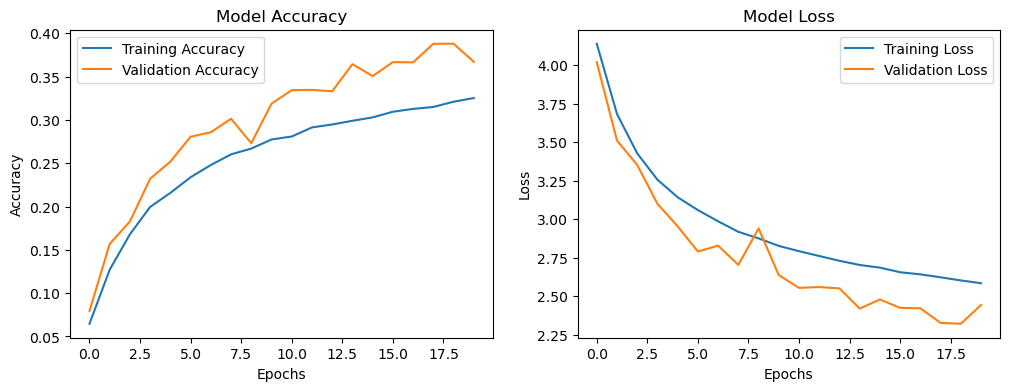

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


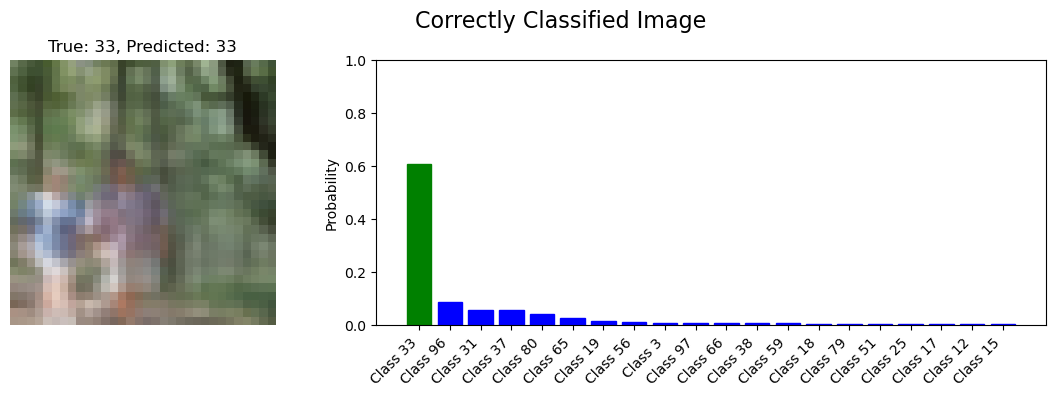

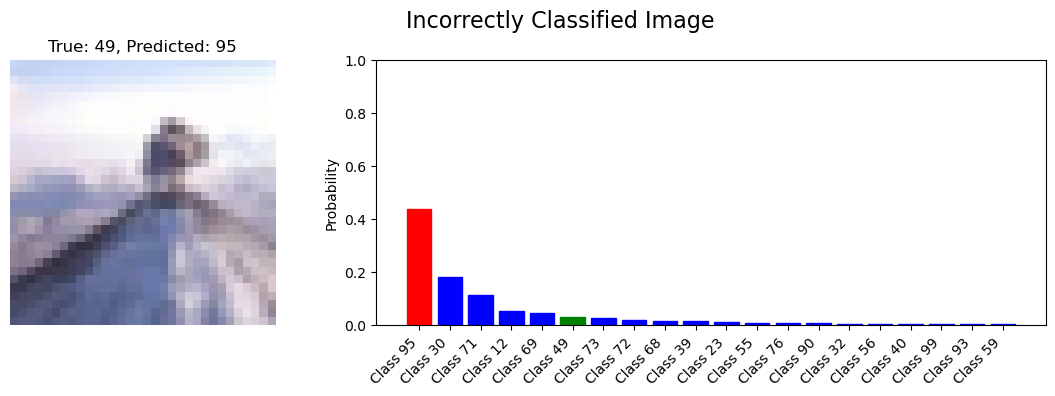

In [19]:
enhanced_metrics = evaluate(enhanced_model)
plot_training_history(enhanced_history)
report_correctly_and_incorrectly_classified_images(enhanced_model)

In [24]:
import pandas as pd

# Calculate percentual difference
percentual_diff = {
    metric: 100 * (enhanced_metrics[metric] - baseline_metrics[metric]) / baseline_metrics[metric]
    for metric in baseline_metrics
}

# Create a DataFrame
metrics_data = {
    "Metric": list(baseline_metrics.keys()),
    "Baseline": list(baseline_metrics.values()),
    "Enhanced": list(enhanced_metrics.values()),
    "Difference (%)": list(percentual_diff.values()),
}

df_metrics = pd.DataFrame(metrics_data).round(decimals=2)

# Display the DataFrame
df_metrics

,Metric,Baseline,Enhanced,Difference (%)
0,test_loss,2.74,2.41,-11.97
1,test_accuracy,0.34,0.37,9.97
2,categorical_crossentropy_loss,2.73,2.41,-11.88


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

**# Your answer here**

The enhanced model shows reduced overfitting compared to the baseline. In the baseline model, validation accuracy initially improves but plateaus early, suggesting potential overfitting. In the enhanced model, validation accuracy continues to track closely with training accuracy across more epochs, indicating better generalization.

The enhanced model also has some minor improved performance:
- **Test Loss** decreased 11.97%
- **Test Accuracy** increased 9.97%
- **Categorical Cross-Entropy Loss** decreased 11.88%

The reduction in overfitting and improved performance is likely due to the added `BatchNormalization` and `Dropout` layers, which help stabilize learning and reduce reliance on specific features during training. Moreover, the enhanced architecture's deeper structure allow for more effective feature extraction.

Despite the improvement, there's still significant room for further optimization. The current accuracy suggests that the model struggles with the complexity of the CIFAR-100 dataset, which contains 100 classes and diverse features. Additional enhancements such as:
- **Data Augmentation** (e.g., flips, rotations),
- **Learning Rate Scheduling**, and
- **Using Pretrained Models** (e.g., ResNet or EfficientNet)

could further boost performance.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [x] Created a branch with the correct naming convention.
- [x] Ensured that the repository is public.
- [x] Reviewed the PR description guidelines and adhered to them.
- [x] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.